In [169]:
import matplotlib.pyplot as plt
import numpy as np
from Functions import JSA
from scipy.linalg import expm

In [230]:
#Parameters
Np = 0.02 # 0.000002 for low gain which agrees well ish
vp = 0.1  # pump velocity
l = 1.0  # amplification region length
sig = 1  # pump wave packet spread
a = 1.61 / 1.13  # from symmetric grp vel matching

def symmetric_v(vp, sig, l, a):
    vi = vp / (1 - 2 * a * vp / (l * sig))
    vs = vp / (1 + 2 * a * vp / (l * sig))
    return vs, vi

vs, vi = symmetric_v(vp, sig, l, a)

N=401
#Frequency values
wi = -4
wf = 4
dw = (wf - wi) / (N - 1)
x = np.linspace(wi, wf, N)

In [231]:
ks = np.diag((1/vs-1/vp)*x)
ki = np.diag((1/vi-1/vp)*x)
F = np.fliplr((np.sqrt(Np)/ (np.sqrt( 2 * np.pi * vs* vi * vp)))*np.eye(len(ks)))#*(np.sqrt(vp)/np.sqrt(2*np.pi)) #theres a correction factor somewhere

Q = np.block([[ks, F],[-np.conjugate(F), -ki]])

Prop = expm(1j*Q*l)

In [232]:
N2 = len(Prop)
Kss = Prop[0 : N2 // 2, 0 : N2 // 2] 
Ksi = Prop[0 : N2 // 2, N2 // 2 : N2] 
Kiss = Prop[N2 // 2 : N2, 0 : N2 // 2] 
# Constructing the moment matrix
M = Kss @ (np.conj(Kiss).T)
# Using SVD of M to construct JSA
L, s, Vh = np.linalg.svd(M)
Sig = np.diag(s)
D = np.arcsinh(2 * Sig) / 2
J = np.abs(L @ D @ Vh) 
# Number of signal photons
Nums = np.conj(Ksi) @ Ksi.T * dw
Numi = Kiss @ (np.conj(Kiss).T) * dw
Ns = np.real(np.trace(Nums))
# Finding K    
Schmidt = (np.real(np.trace(Nums))**2/np.real(np.trace(Nums@Nums))) * dw

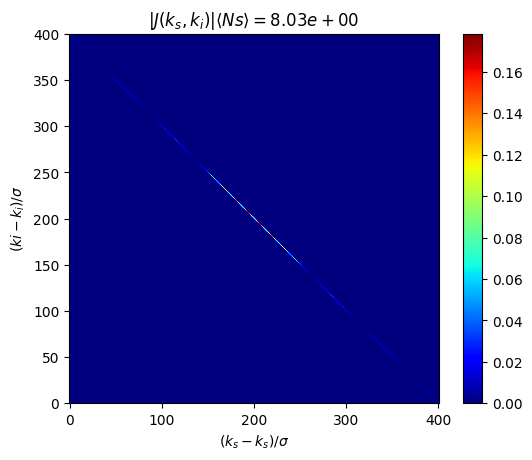

(0.17841241161527713, 8.028404379170023, 1.5731713705511343)

In [234]:
fig, ax = plt.subplots()
im = ax.imshow(J*np.sqrt(vs*vi), cmap="jet", origin="lower")
ax.set_xlabel(r"$(k_{s}-k_{s})/\sigma$")
ax.set_ylabel(r"$(k{i}-k_{i})/\sigma$")
ax.set_title(r"$|J(k_{s}, k_{i})|    \langle Ns \rangle = %1.2e $" %Ns)
plt.colorbar(im, orientation="vertical")
plt.show()

np.amax(J)*np.sqrt(vs*vi),Ns,Schmidt

In [87]:
#dw's where i put them before
# (max(J),Ns,K) for different values of Nw
#(4.460310290381928, 200.72055581234645, 39.333369926116454) Nw=201
#(8.920620580763856, 401.4202189585012, 78.65856852755672) Nw=401
#(13.380930871145784, 602.1197808613827, 117.98372775958491) Nw= 601


#dw's multiplying Ns Ni and JSA as well as K
#(0.17841241161527713, 8.028822232493855, 1.5733347970446583) Nw=201
#(0.17841241161527713, 8.028404379170023, 1.5731713705511345) Nw= 401
#(0.17841241161527713, 8.028263744818435, 1.5731163701277988) Nw= 601


#sqrt(dw) multiplying propagator with extra multiplyer for Schmidt (not sure why)
#(0.7539715876660014, 8.028822232493857, 1.2024047552934731) 201
#(0.7847892481112269, 8.028404379170023, 1.1873427806818608) 401
#(0.7912795121304359, 8.028263744818435, 1.1841957208061953) 601



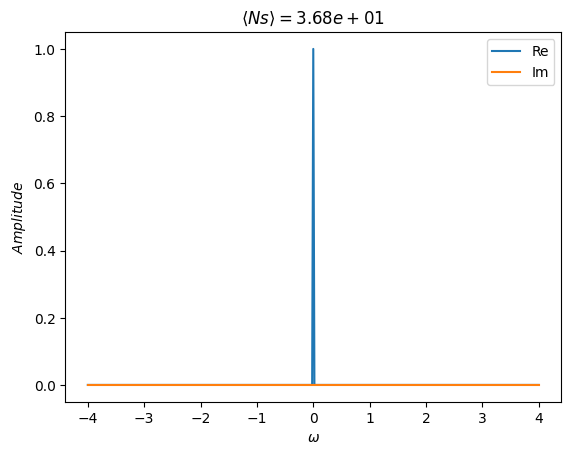

In [202]:
mark=1 #this just takes the first eigenmode of interest. Choose a different value to look at different ones.
val1, u1 = np.linalg.eigh(Nums)

fig, ax1 = plt.subplots()

ax1.plot(x, np.real(np.exp(-1j*np.angle(u1[(N-1)//2,-mark]))*u1[:,-mark]), label='Re') #Here we multiply by a phase factor such that the imaginary part is 0 at the origin.
ax1.plot(x, np.imag(np.exp(-1j*np.angle(u1[(N-1)//2,-mark]))*u1[:,-mark]), label='Im')
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"$Amplitude$")
ax1.set_title(r"$\langle Ns \rangle= %1.2e$" %Ns)
ax1.legend()
plt.show()

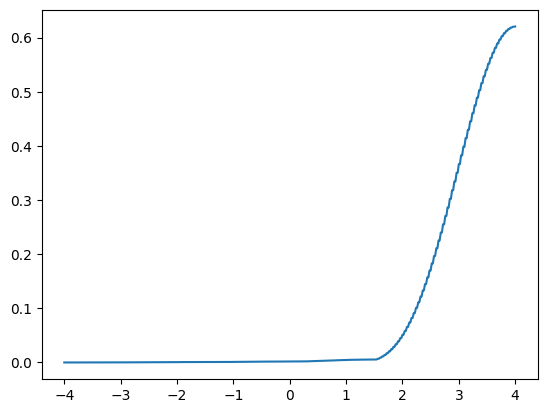

In [203]:
plt.plot(x,val1)

In [174]:
N=801
#Frequency values
wi = -4
wf = 4
dw = (wf - wi) / (N - 1)
x = np.linspace(wi, wf, N)

In [175]:
#lets just treat it as not a big matrix equation but something like a 2x2 that depends on x
kst= lambda x: (1/vs-1/vp)*x
kit= lambda x: (1/vi-1/vp)*x
Ft = (np.sqrt(Np)/ (np.sqrt( 2 * np.pi * vs* vi*  vp)))
Qt = lambda x: np.array([[kst(x), Ft],[-Ft, kit(x)]])

Propt =lambda x: expm(1j*Qt(x)*l)
Pss=lambda x: Propt(x)[0,0]
Psi=lambda x: Propt(x)[0,1]
Piss=lambda x: Propt(x)[1,0]

Numst = lambda x: np.real(np.conj(Psi(x)) * Psi(x))

In [176]:
#Finding the index that will cause the flip to happen
value = Ft/(1/vs-1/vp)
vec = np.abs(x[0:N//2])
index = np.argmin(np.abs(vec-value))

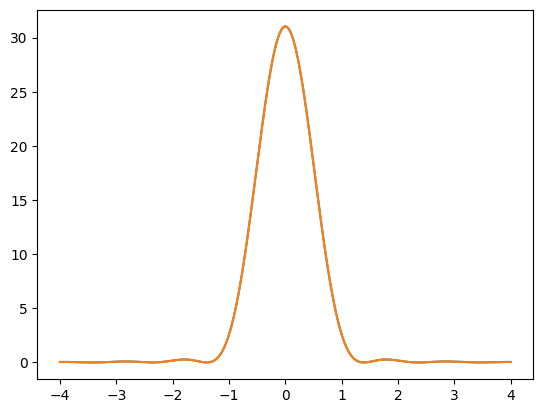

In [177]:
num_omega=np.zeros_like(x)
num_omegaTH=np.zeros_like(x)
for i in range(len(x)):
    num_omega[i] = Numst(x[i])

for i in range(index): #value at which arg in sqrt becomes negative  
    num_omegaTH[i] = (Ft**2)*np.abs(np.sin(np.sqrt(kst(x[i])**2-Ft**2)*l)/np.sqrt(kst(x[i])**2-Ft**2))**2
    num_omegaTH[-(i+1)] = (Ft**2)*np.abs(np.sin(np.sqrt(kst(x[-(i+1)])**2-Ft**2)*l)/np.sqrt(kst(x[-(i+1)])**2-Ft**2))**2

for i in range(index,N-(index),1):    
    num_omegaTH[i] = (Ft**2)*np.abs(np.sinh(np.sqrt(np.abs(kst(x[i])**2-Ft**2))*l)/np.sqrt(np.abs(kst(x[i])**2-Ft**2)))**2
    num_omegaTH[-(i+1)] = (Ft**2)*np.abs(np.sinh(np.sqrt(np.abs(kst(x[-(i+1)])**2-Ft**2))*l)/np.sqrt(np.abs(kst(x[-(i+1)])**2-Ft**2)))**2
plt.plot(x,num_omega)
plt.plot(x,num_omegaTH)

In [178]:
Nst = np.sum(num_omega)*dw
Nst2 = np.sum(num_omega**2)*dw
Schmidt = Nst**2/Nst2
Nst,Nst2,Schmidt

(36.771946238626676, 823.5695826860853, 1.6418479489811983)

In [181]:
#This section is like the one above but I take the EoMs before the z-shift, so that the FT are all normally definedto some extent.
ks2= lambda x: x/vs
ki2= lambda x: x/vi
deltaK = lambda x: (ks2(x)-ki2(x))/2
Ft2 = (np.sqrt(Np)/ (np.sqrt( 2 * np.pi * vs* vi*  vp)))#*(np.sqrt(vp/(2*np.pi)))


In [182]:
#Finding the index that will cause the flip to happen
arg = deltaK(x[0:N//2])**2-Ft2**2
index2 = np.argmin(np.abs(deltaK(x[0:N//2])**2-Ft2**2))
index2

315

In [183]:
num_omegaTH2 = np.zeros_like(x)

for i in range(index2):
    num_omegaTH2[i] = (Ft2**2)*np.abs(np.sin(np.sqrt(deltaK(x[i])**2-Ft2**2)*l)/np.sqrt(deltaK(x[i])**2-Ft2**2))**2
    num_omegaTH2[-(i+1)] = (Ft2**2)*np.abs(np.sin(np.sqrt(deltaK(x[-(i+1)])**2-Ft2**2)*l)/np.sqrt(deltaK(x[-(i+1)])**2-Ft2**2))**2

for i in range(index2,N-(index2),1):
    num_omegaTH2[i] = (Ft2**2)*np.abs(np.sinh(np.sqrt(np.abs(deltaK(x[i])**2-Ft2**2))*l)/np.sqrt(np.abs(deltaK(x[i])**2-Ft2**2)))**2
    num_omegaTH2[-(i+1)] = (Ft2**2)*np.abs(np.sinh(np.sqrt(np.abs(deltaK(x[-(i+1)])**2-Ft2**2))*l)/np.sqrt(np.abs(deltaK(x[-(i+1)])**2-Ft2**2)))**2

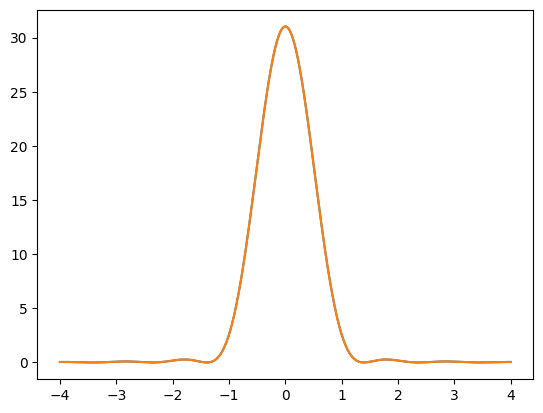

In [185]:
plt.plot(x,num_omegaTH2)
plt.plot(x,num_omegaTH)

In [186]:
Nst1 = np.sum(num_omega)*dw
Nst12 = np.sum(num_omega**2)*dw
Schmidt2 = Nst1**2/Nst12
Nst1,Nst12,Schmidt2

(36.771946238626676, 823.5695826860853, 1.6418479489811983)